In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jacklizhi/creditcard")

print("Path to dataset files:", path)
df


Path to dataset files: /root/.cache/kagglehub/datasets/jacklizhi/creditcard/versions/1


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204076,135100.0,2.126725,-0.105402,-1.510722,0.165252,0.376540,-0.534798,0.131359,-0.228139,0.648901,...,-0.355017,-0.888680,0.220120,-1.069895,-0.181889,0.266874,-0.070569,-0.071622,1.98,0.0
204077,135100.0,-0.582696,2.109869,0.699058,4.350850,0.524572,0.436313,0.671204,0.087439,-1.980439,...,-0.131965,-0.288737,0.194044,1.115286,-0.979408,-0.089576,-0.227109,0.015287,13.26,0.0
204078,135101.0,1.988614,-0.207240,-0.259236,0.440332,-0.592331,-0.694481,-0.372261,-0.152909,1.108784,...,-0.170658,-0.280954,0.351013,-0.037285,-0.381279,-0.624344,0.042626,-0.028725,7.47,0.0
204079,135102.0,1.862102,-0.124052,-1.989752,0.382609,0.473032,-0.674517,0.298621,-0.282416,0.802053,...,-0.204158,-0.511441,0.077874,0.388335,0.007896,-0.120980,-0.019579,0.006155,108.51,1.0


In [ ]:


df = df.drop(['Time','Class'], axis=1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204076,2.126725,-0.105402,-1.510722,0.165252,0.376540,-0.534798,0.131359,-0.228139,0.648901,0.073445,...,-0.212019,-0.355017,-0.888680,0.220120,-1.069895,-0.181889,0.266874,-0.070569,-0.071622,1.98
204077,-0.582696,2.109869,0.699058,4.350850,0.524572,0.436313,0.671204,0.087439,-1.980439,1.964617,...,0.244790,-0.131965,-0.288737,0.194044,1.115286,-0.979408,-0.089576,-0.227109,0.015287,13.26
204078,1.988614,-0.207240,-0.259236,0.440332,-0.592331,-0.694481,-0.372261,-0.152909,1.108784,-0.196439,...,-0.151209,-0.170658,-0.280954,0.351013,-0.037285,-0.381279,-0.624344,0.042626,-0.028725,7.47
204079,1.862102,-0.124052,-1.989752,0.382609,0.473032,-0.674517,0.298621,-0.282416,0.802053,-0.989431,...,0.150727,-0.204158,-0.511441,0.077874,0.388335,0.007896,-0.120980,-0.019579,0.006155,108.51


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(df, test_size=0.2)

In [ ]:
print(x_train.shape[1])
print(x_test.shape[1])
type(x_train)

29
29


pandas.core.frame.DataFrame

In [ ]:
from keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import layers, models

In [ ]:
encoder = tf.keras.models.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(20, activation='relu')
])

decoder = tf.keras.models.Sequential([
    layers.Input(shape=(20,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(x_train.shape[1], activation='linear')
])

model = tf.keras.models.Sequential([
    encoder,
    decoder
])

In [ ]:
model.compile(optimizer='adam', loss ='mean_squared_error')

In [ ]:
history = model.fit(
    x_train,
    x_train,
    validation_data=(x_test,x_test),
    epochs=5,
    batch_size = 100,
    shuffle=True
)

Epoch 1/5
1633/1633 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: nan - val_loss: nan
Epoch 2/5
1633/1633 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: nan - val_loss: nan
Epoch 3/5
1633/1633 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: nan - val_loss: nan
Epoch 4/5
1633/1633 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: nan - val_loss: nan
Epoch 5/5
1633/1633 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: nan - val_loss: nan


<Axes: >

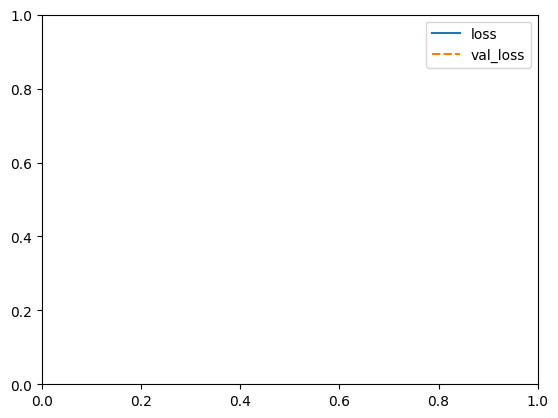

In [ ]:
import seaborn as sns
sns.lineplot(model.history.history)

In [ ]:
predictions = model.predict(x_test)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)

1276/1276 ━━━━━━━━━━━━━━━━━━━━ 1s 866us/step


In [ ]:
threshold = np.percentile(mse, 95)
threshold

nan

In [ ]:
anomalies = mse > threshold

In [ ]:

num_anomalies = np.sum(anomalies)
print(f"Number of Anomalies: {num_anomalies}")

Number of Anomalies: 0


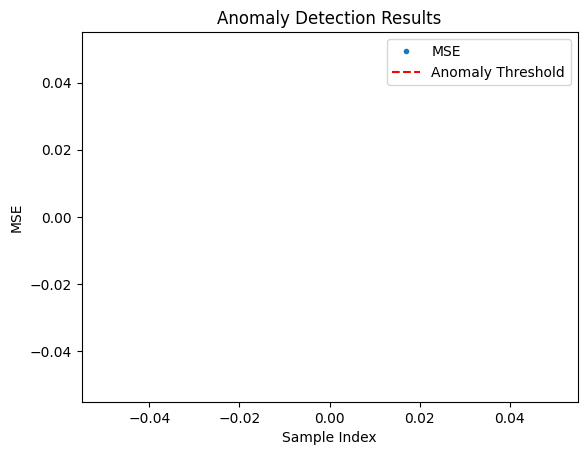

In [ ]:
import matplotlib.pyplot as plt
plt.plot(mse, marker='o', linestyle='', markersize=3, label='MSE', )
plt.axhline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()

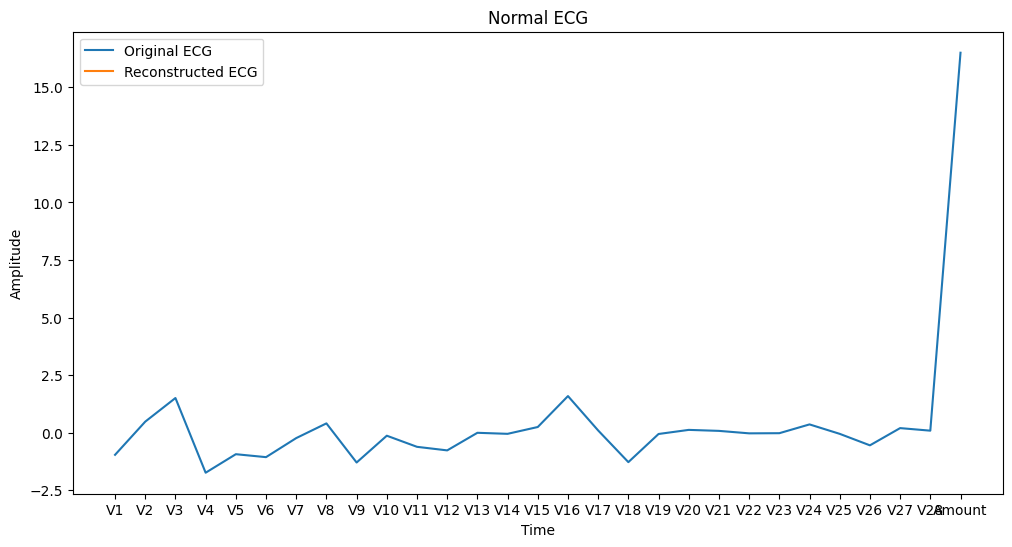

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(x_test.iloc[0], label='Original ECG')
plt.plot(predictions[0], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Normal ECG')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


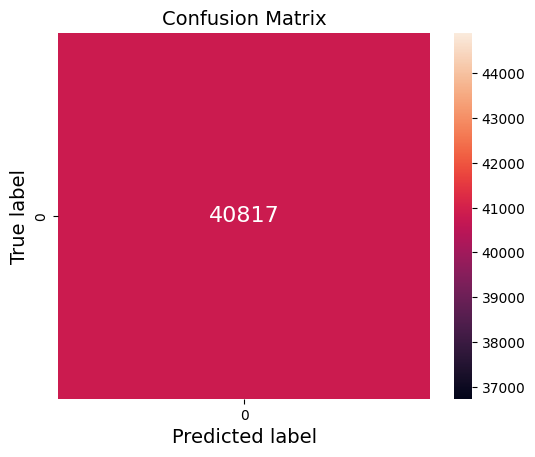

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (6, 4.75))
sns.heatmap(confusion_matrix(anomalies, anomalies), annot = True, annot_kws = {"size": 16}, fmt = 'd')

plt.xlabel("Predicted label", fontsize = 14)
plt.ylabel("True label", fontsize = 14)
plt.title("Confusion Matrix", fontsize = 14)
plt.grid(False)
plt.show()